In [1]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
# import functions from modsim

from modsim import *

In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap11.py')

Downloaded chap11.py


In [4]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap12.py')

Downloaded chap12.py


In [5]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap13.py')

Downloaded chap13.py


In [6]:
# import code from previous notebooks

from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

from chap13 import sweep_beta
from chap13 import sweep_parameters

In [7]:
beta_array = [0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.9, 1.0 , 1.1]
gamma_array = [0.2, 0.4, 0.6, 0.8]
frame = sweep_parameters(beta_array, gamma_array)

In [8]:
frame.head()

,0.2,0.4,0.6,0.8
Parameter,,,,
0.1,0.010756,0.003642,0.002191,0.001567
0.2,0.118984,0.010763,0.005447,0.003644
0.3,0.589095,0.030185,0.010771,0.006526
0.4,0.801339,0.131563,0.020917,0.010780
0.5,0.896577,0.396409,0.046140,0.017640


In [9]:
for gamma in frame.columns:
    column = frame[gamma]
    for beta in column.index:
        metric = column[beta]
        print(beta, gamma, metric)

0.1 0.2 0.010756340768063644
0.2 0.2 0.11898421353185373
0.3 0.2 0.5890954199973404
0.4 0.2 0.8013385277185551
0.5 0.2 0.8965769637207062
0.6 0.2 0.942929291399791
0.7 0.2 0.966299311298026
0.8 0.2 0.9781518959989762
0.9 0.2 0.9840568957948106
1.0 0.2 0.9868823507202488
1.1 0.2 0.988148177093735
0.1 0.4 0.0036416926514175607
0.2 0.4 0.010763463373360094
0.3 0.4 0.030184952469116566
0.4 0.4 0.131562924303259
0.5 0.4 0.3964094037932606
0.6 0.4 0.5979016626615987
0.7 0.4 0.7284704154876106
0.8 0.4 0.8144604459153759
0.9 0.4 0.8722697237137128
1.0 0.4 0.9116692168795855
1.1 0.4 0.9386802509510287
0.1 0.6 0.002190722188881611
0.2 0.6 0.005446688837466351
0.3 0.6 0.010771139974975585
0.4 0.6 0.020916599304195316
0.5 0.6 0.04614035896610047
0.6 0.6 0.13288938996079536
0.7 0.6 0.3118432512847451
0.8 0.6 0.47832565854255393
0.9 0.6 0.605687582114665
1.0 0.6 0.7014254793376209
1.1 0.6 0.7738176405451065
0.1 0.8 0.0015665254038139675
0.2 0.8 0.003643953969662994
0.3 0.8 0.006526163529085194
0.4 0

In [10]:
from matplotlib.pyplot import plot

def plot_sweep_frame(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            metric = column[beta]
            plot(beta/gamma, metric, '.', color='C1')

For each element of the `SweepFrame` it plots a point with the ratio `beta/gamma` as the $x$ coordinate and `metric` -- which is the fraction of the population that's infected -- as the $y$ coordinate.

Here's what it looks like:

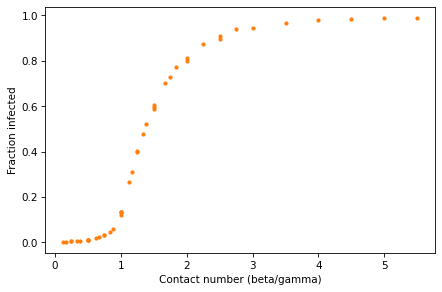

In [11]:
plot_sweep_frame(frame)

decorate(xlabel='Contact number (beta/gamma)',
         ylabel='Fraction infected')

In [12]:
s_inf_array = linspace(0.003, 0.99, 50)

In [13]:
from numpy import log

c_array = log(s_inf_array) / (s_inf_array - 1)

In [14]:
frac_infected = 1 - s_inf_array

In [15]:
frac_infected_series = make_series(c_array, frac_infected)

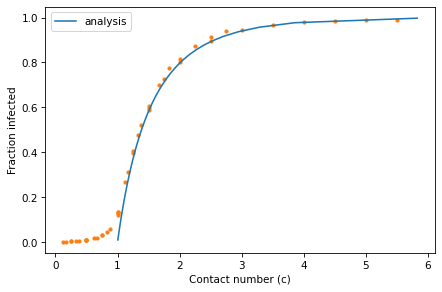

In [16]:
plot_sweep_frame(frame)
frac_infected_series.plot(label='analysis')

decorate(xlabel='Contact number (c)',
         ylabel='Fraction infected')

### Exercise 1



In [17]:
def plot_sweep_frame_difference(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            metric = column[beta]
            plot(beta - gamma, metric, '.', color='C1')

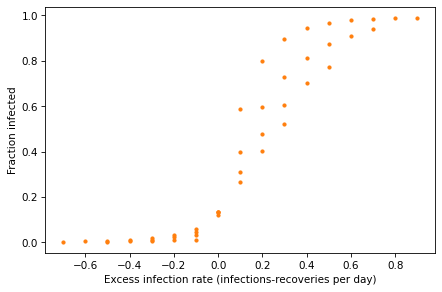

In [18]:
plot_sweep_frame_difference(frame)

decorate(xlabel='Excess infection rate (infections-recoveries per day)',
         ylabel='Fraction infected')


In [19]:
# The results don't fall on a curve, which means that if we
# know the difference between `beta` and `gamma`,
# but not their ratio, that's not enough to predict
# the fraction infected.

### Exercise 2



In [20]:
show(frac_infected_series)


,values
index,
5.826623,0.997000
3.855292,0.976857
3.281996,0.956714
2.944613,0.936571
2.708398,0.916429
2.528340,0.896286
2.383888,0.876143
2.263951,0.856000
2.161874,0.835857


In [21]:
# It looks like the fraction infected is 0.26 when the contact
# number is about 1.16

### Exercise 3



In [22]:
def sweep_beta_max(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = results.i.max()
    return sweep

In [23]:
def sweep_parameters_max(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta_max(beta_array, gamma)
    return frame

In [24]:
frame_max = sweep_parameters_max(beta_array, gamma_array)


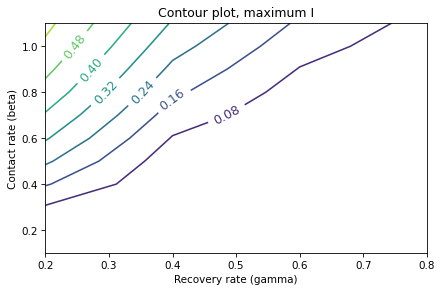

In [25]:
contour(frame_max)

decorate(xlabel='Recovery rate (gamma)',
         ylabel='Contact rate (beta)',
         title='Contour plot, maximum I')

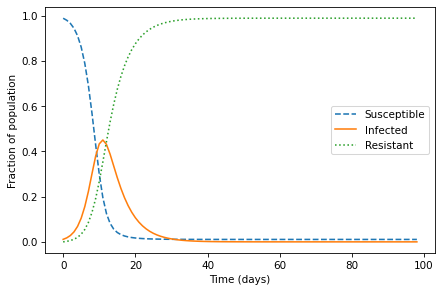

In [26]:
system = make_system(0.8, 0.2)
results = run_simulation(system, update_func)
plot_results(results.s, results.i, results.r)

In [27]:
from matplotlib.pyplot import plot

def plot_sweep_frame(frame):
    for gamma in frame.columns:
        series = frame[gamma]
        for beta in series.index:
            metric = series[beta]
            plot(beta/gamma, metric, '.', color='C1')


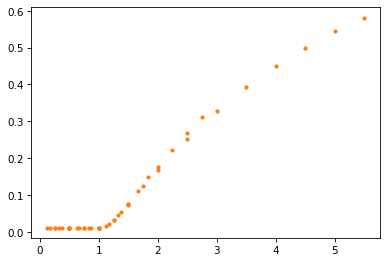

In [28]:
plot_sweep_frame(frame_max)


## Under the Hood


In [29]:
frac_infected_series = make_series(c_array, frac_infected)

In [30]:
from pandas import Series

frac_infected_series = Series(frac_infected, c_array)